In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cifar10_exp_dir = "../../csco_database/hybnas-cifar10-search/"
imagenet_exp_dir = "../../csco_database/hybnas-imagenet-search-augmented/"

cifar10_exp_dir_flops = "../../csco_database/hybnas-cifar10-search-flops/"
imagenet_exp_dir_flops = "../../csco_database/hybnas-imagenet-search-flops/"

def gather_all_records_in_dir(exp_dir, task="cifar10"):
    all_records_path = os.listdir(exp_dir)
    all_recs = []
    for rec in all_records_path:
        if rec.startswith("shard-"):
            with open(os.path.join(exp_dir, rec, "{}.records".format(task)), 'rb') as fp:
                records = pickle.load(fp)
                all_recs += records
    return all_recs

In [3]:
# all_recs = gather_all_records_in_dir(imagenet_exp_dir, "imagenet")
all_recs = gather_all_records_in_dir(cifar10_exp_dir, "cifar10")

In [4]:
a = all_recs[0]['hash']

In [5]:
all_recs[0]

{'best_acc1': 74.72,
 'best_loss': 0.7811625897884369,
 'params(M)': 0.101178,
 'MACs(M)': 22.205066,
 'hash': '010000000000000000001001100000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000010000000000001000000000000000001001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010010000000000100000000000000000000000000000000000000000000000000000000010000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000'}

In [7]:

params = [x['params(M)'] for x in all_recs]
MACs = [x['MACs(M)'] for x in all_recs]
hashes = [x['hash'] for x in all_recs]
lats = [x['Mean_Lat(ms)'] for x in all_recs]

print(len(params))

KeyError: 'Mean_Lat(ms)'

In [8]:
for item in hashes:
    assert isinstance(item, str), AssertionError(item)

In [9]:
unique_hashes = np.unique(np.asarray(hashes))

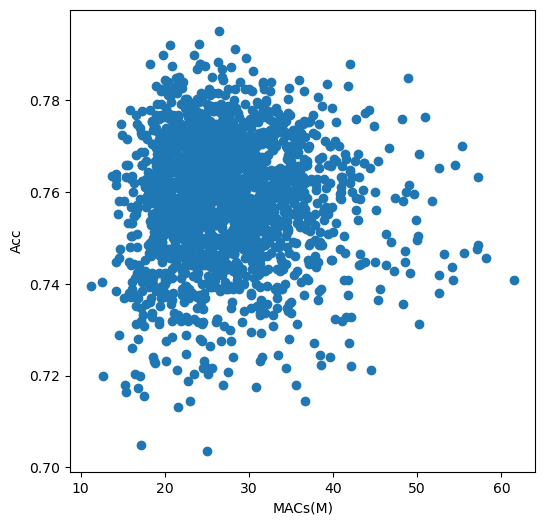

In [10]:
best_acc1 = [x['best_acc1'] / 100 for x in all_recs]
plt.figure(figsize=(6, 6))
plt.scatter(MACs, best_acc1)
plt.xlabel("MACs(M)")
plt.ylabel("Acc")
plt.show()

In [11]:
best_acc1 = [x['best_acc1'] / 100 for x in all_recs]
plt.figure(figsize=(6, 6))
plt.scatter(lats, best_acc1)
plt.xlabel('Mean_Lat(ms)')
plt.ylabel("Acc")
plt.show()

NameError: name 'lats' is not defined

<Figure size 600x600 with 0 Axes>

In [12]:
print(np.mean(best_acc1))
print(np.std(best_acc1))

0.7582366648850882
0.013675021895104163


In [13]:
print(np.max(best_acc1))
print(np.min(best_acc1))

0.7951999999999999
0.7036


In [14]:
print(len(MACs))
print(np.mean(MACs))
print(np.std(MACs))

1871
27.34429158631748
7.1322343200614675


In [15]:
print(len(lats))
print(np.min(lats))
print(np.max(lats))

NameError: name 'lats' is not defined

In [16]:
print(np.min(MACs))
print(np.max(MACs))

11.260554
61.510282


In [17]:
print(np.max(params))
print(np.min(params))

0.305114
0.057306


### Filter out the best random search config.

In [18]:
all_recs = np.asarray(all_recs)
sorted_rec_args = np.argsort(best_acc1)
all_recs = all_recs[sorted_rec_args]

In [19]:
print(all_recs[-1])

{'best_acc1': 79.52, 'best_loss': 0.6880022957921028, 'params(M)': 0.20361, 'MACs(M)': 26.448522, 'hash': '010000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000000000000000001000000000000001001001000000001000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010100000000000000000000000000000000000000000000000000000000000000010011000000000000001000000001110000000000001100000000000110000000000000000000000000010000000000000'}
